In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

sns.set_theme(context='paper', style='whitegrid', font_scale=1)

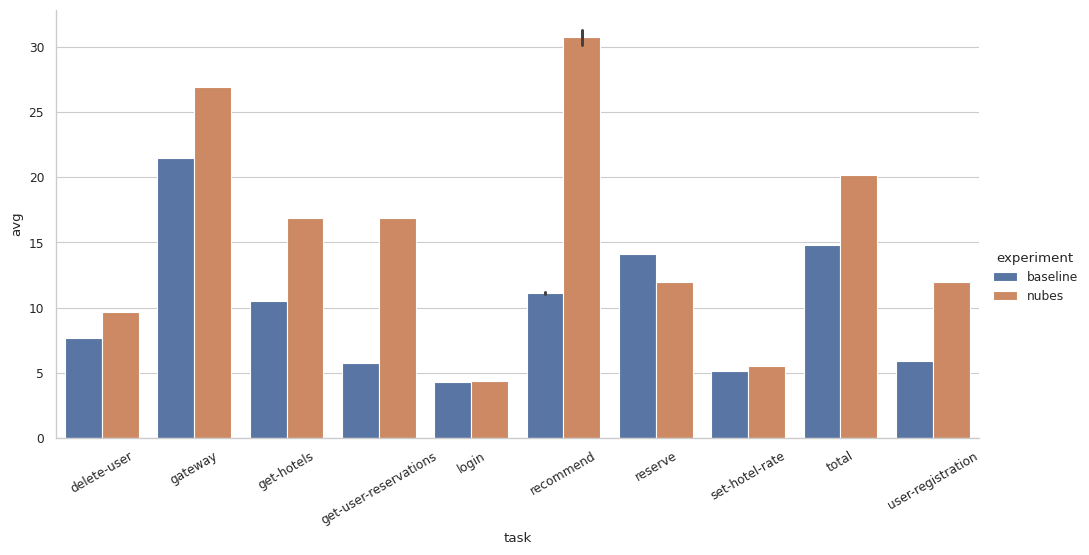

In [68]:
config="medium-330s-*"
experiment="*"
metric="duration"
statistic="avg"

g = f"result/{experiment}/*-{config}-{metric}.csv"

# Create an empty list to store individual dataframes
dataframes = []

# Iterate over each CSV file using glob
for file in glob.glob(g):
    # Read the CSV file into a dataframe
    df = pd.read_csv(file)
    # Add a new column with the filename
    df['filename'] = file

    df = df.iloc[-2:-1]

    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
df = pd.concat(dataframes, ignore_index=True)
df = df.sort_values(["experiment", "task"])

# print(df.head())
g = sns.catplot(data=df, x="task", y=statistic, hue="experiment", kind="bar", aspect=2)
g.set_titles(template="")
g.set_xticklabels(rotation=30)

# plt.tight_layout()

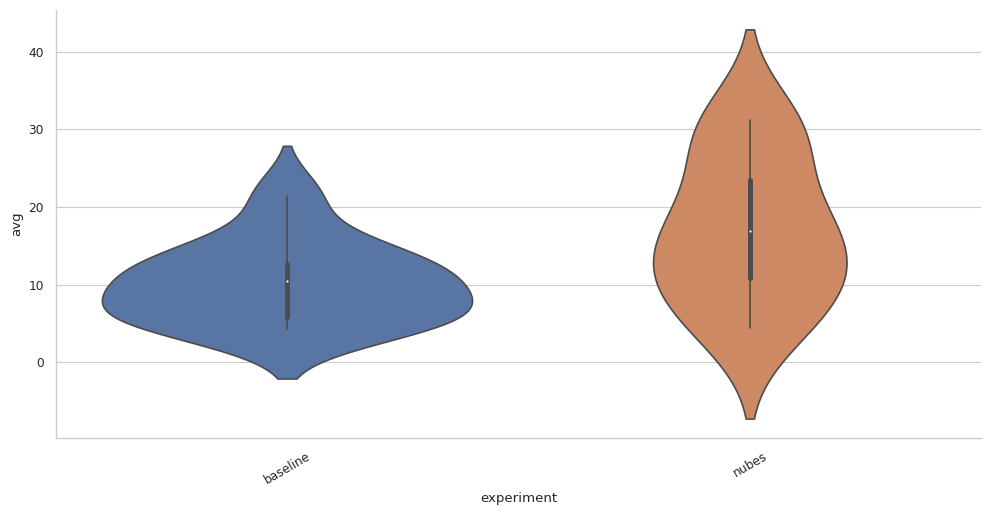

In [72]:
g = sns.catplot(data=df, x="experiment", y=statistic, kind="violin", aspect=2)
g.set_titles(template="{title}")
g.set_xticklabels(rotation=30)
